In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

C:\Users\Omar\AppData\Local\Temp\ipykernel_12244\747566074.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read train.csv file into a DataFrame
df_credit = pd.read_csv('./Step_1_modified_df_credit_train.csv')

df_credit

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


In [3]:
df_credit.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [4]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

In [5]:
# Remove rows where 'Payment_Behaviour' is equal to '!@9#%8'
df_credit = df_credit.loc[df_credit['Payment_Behaviour'] != '!@9#%8']


In [6]:
unique_values = df_credit['Payment_Behaviour'].unique()
unique_values

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [7]:
# Define columns to drop
columns_to_drop = ['ID', 'SSN', 'Annual_Income', 'Type_of_Loan', 'Credit_History_Age'] #'Payment_Behaviour decide on this

# Drop the specified columns
df_credit_dropped = df_credit.drop(columns=columns_to_drop)

df_credit_dropped

,Customer_ID,Month,Name,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,Aaron Maashoh,23.0,Scientist,1824.843333,3,4,3,4.0,...,4.0,_,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,Aaron Maashoh,23.0,Scientist,NaN,3,4,3,4.0,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,Aaron Maashoh,-500.0,Scientist,NaN,3,4,3,4.0,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,Aaron Maashoh,23.0,Scientist,NaN,3,4,3,4.0,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,Aaron Maashoh,23.0,Scientist,1824.843333,3,4,3,4.0,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,CUS_0x942c,March,Nicks,25.0,Mechanic,3359.415833,4,6,7,2.0,...,3.0,_,502.38,39.323569,No,35.104023,140.581403,High_spent_Medium_value_payments,NaN,Poor
99995,CUS_0x942c,April,Nicks,25.0,Mechanic,3359.415833,4,6,7,2.0,...,3.0,_,502.38,34.663572,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,CUS_0x942c,May,Nicks,25.0,Mechanic,3359.415833,4,6,7,2.0,...,3.0,_,502.38,40.565631,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,CUS_0x942c,June,Nicks,25.0,Mechanic,3359.415833,4,6,5729,2.0,...,3.0,Good,502.38,41.255522,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor


In [8]:
df_credit_dropped.describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,92400.000000,78558.000000,92400.000000,92400.000000,92400.000000,92400.000000,92400.000000,85980.000000,90458.000000,90594.000000,92400.000000,92400.000000,92400.000000,88268.000000,8.976200e+04
mean,109.775400,4193.007766,17.078355,22.458258,72.601299,2.961450,21.068907,31.104629,10.399198,27.871360,1425.550230,32.285537,1408.948563,637.385623,-3.342172e+22
std,680.766376,3184.528231,117.333044,128.953017,467.720459,61.940497,14.878533,227.538433,6.790016,194.102615,1154.398294,5.118272,8324.648660,2043.282632,3.337601e+24
min,-500.000000,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1623.729167,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.340000,3.000000,566.210000,28.053576,30.291558,74.595313,2.699471e+02
50%,33.000000,3089.149167,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.420000,6.000000,1165.670000,32.304018,69.100853,135.891560,3.364077e+02
75%,42.000000,5964.883333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.880000,9.000000,1945.030000,36.496305,160.992411,265.834695,4.699134e+02
max,8698.000000,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [9]:
def filter_greater_than_threshold(column_name, threshold):
    """
    Filter out rows from the DataFrame where the specified column values are greater than the threshold.

    Parameters:
        column_name (str): The name of the column to filter.
        threshold (int or float): The threshold value for filtering.

    Returns:
        None
    """
    global df_credit_dropped
    df_credit_dropped = df_credit_dropped[df_credit_dropped[column_name] <= threshold]

# Call the function to filter the DataFrame
filter_greater_than_threshold('Num_Credit_Card', 15) # max num of credit cards 15
filter_greater_than_threshold('Interest_Rate', 40) # max 40% interest rate
filter_greater_than_threshold('Num_of_Loan', 10) #max loans 10
filter_greater_than_threshold('Num_of_Delayed_Payment', 24) # max 24 months 
filter_greater_than_threshold('Num_Credit_Inquiries', 20) # max 20 inquiries 

# Replace negative values with NaN
df_credit_dropped['Num_of_Loan'] = df_credit_dropped['Num_of_Loan'].apply(lambda x: np.nan if x < 0 else x)
df_credit_dropped['Num_of_Delayed_Payment'] = df_credit_dropped['Num_of_Delayed_Payment'].apply(lambda x: np.nan if x < 0 else x)

# Specify the columns for which you want to print summary statistics
columns_of_interest = ['Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']

# Print the summary statistics for the specified columns
df_credit_dropped[columns_of_interest].describe()


,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries
count,76324.000000,76324.000000,73373.000000,75770.000000,76324.000000
mean,5.488012,14.284471,3.457089,13.101227,5.682904
std,2.052857,8.670195,2.410255,5.965172,3.828377
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4.000000,7.000000,2.000000,9.000000,3.000000
50%,5.000000,13.000000,3.000000,13.000000,5.000000
75%,7.000000,20.000000,5.000000,18.000000,8.000000
max,15.000000,34.000000,9.000000,24.000000,17.000000


In [10]:
df_credit_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76324 entries, 0 to 99996
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               76324 non-null  object 
 1   Month                     76324 non-null  object 
 2   Name                      68675 non-null  object 
 3   Age                       76324 non-null  float64
 4   Occupation                76324 non-null  object 
 5   Monthly_Inhand_Salary     64822 non-null  float64
 6   Num_Bank_Accounts         76324 non-null  int64  
 7   Num_Credit_Card           76324 non-null  int64  
 8   Interest_Rate             76324 non-null  int64  
 9   Num_of_Loan               73373 non-null  float64
 10  Delay_from_due_date       76324 non-null  int64  
 11  Num_of_Delayed_Payment    75770 non-null  float64
 12  Changed_Credit_Limit      74709 non-null  float64
 13  Num_Credit_Inquiries      76324 non-null  float64
 14  Credit_Mix 

In [11]:
# Write the DataFrame to a CSV file
df_credit_dropped.to_csv('step_2_modified_df_credit_train.csv', index=False)

### Visuals and EDAs

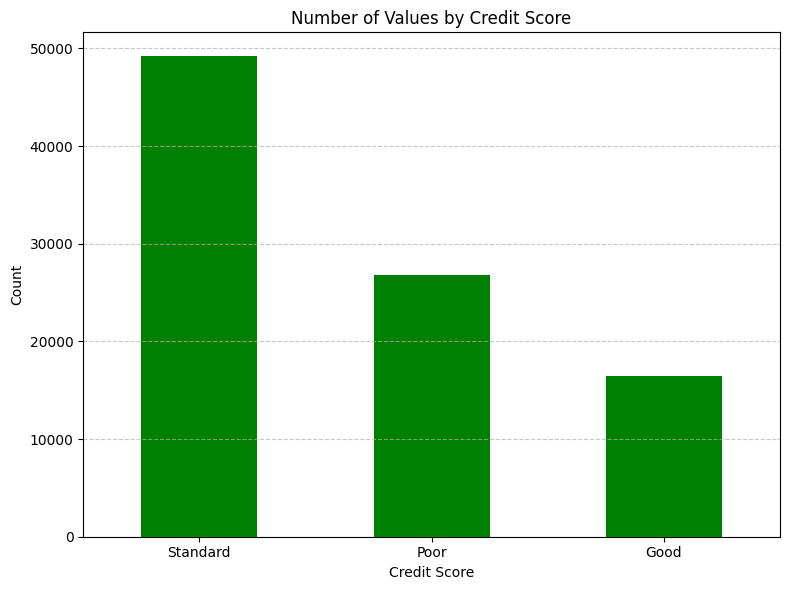

In [12]:
credit_score_counts = df_credit['Credit_Score'].value_counts()

plt.figure(figsize=(8, 6))
credit_score_counts.plot(kind='bar', color='Green')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Number of Values by Credit Score')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better visualization
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

C:\Users\Omar\AppData\Local\Temp\ipykernel_12244\2891127505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Occupation', y='Credit_Score', data=df_credit, palette='rainbow')


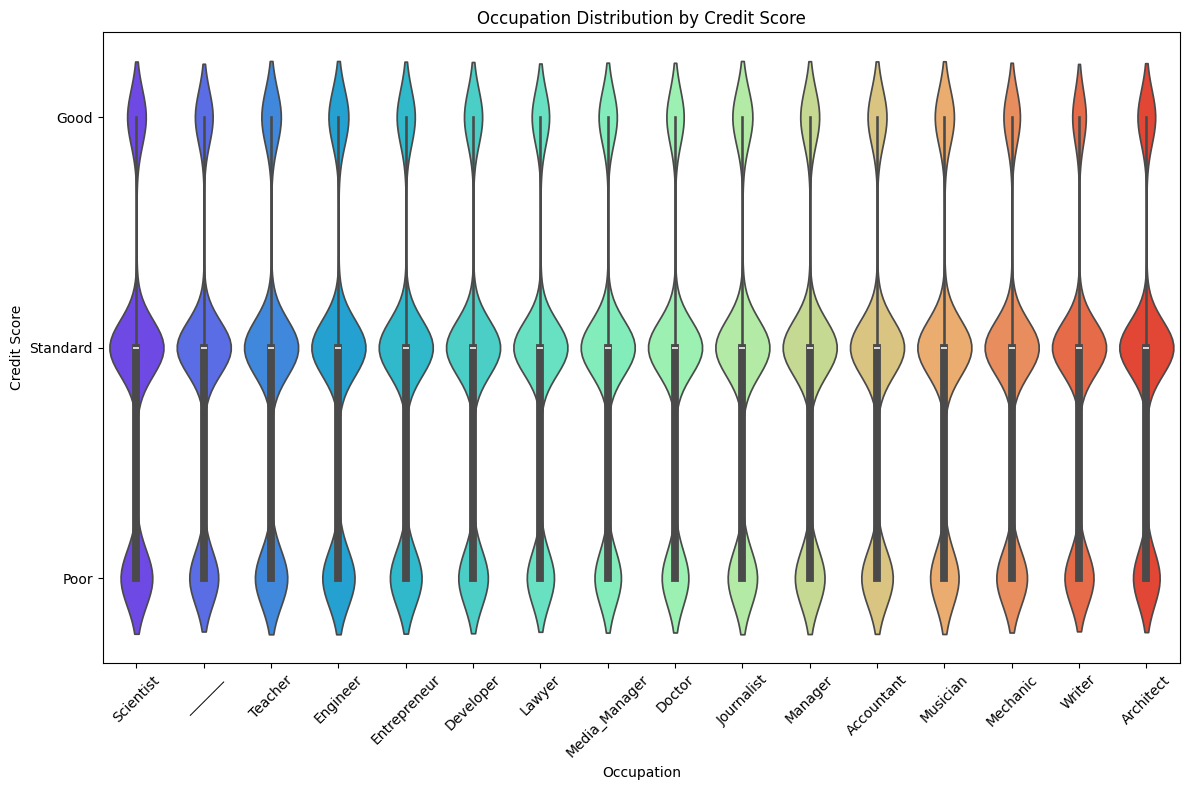

In [13]:

plt.figure(figsize=(12, 8))
sns.violinplot(x='Occupation', y='Credit_Score', data=df_credit, palette='rainbow')
plt.title('Occupation Distribution by Credit Score')
plt.xlabel('Occupation')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

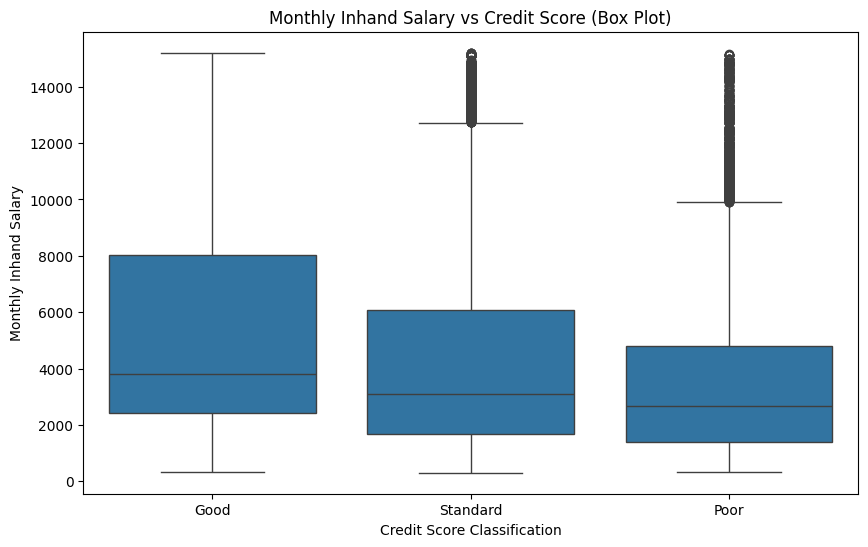

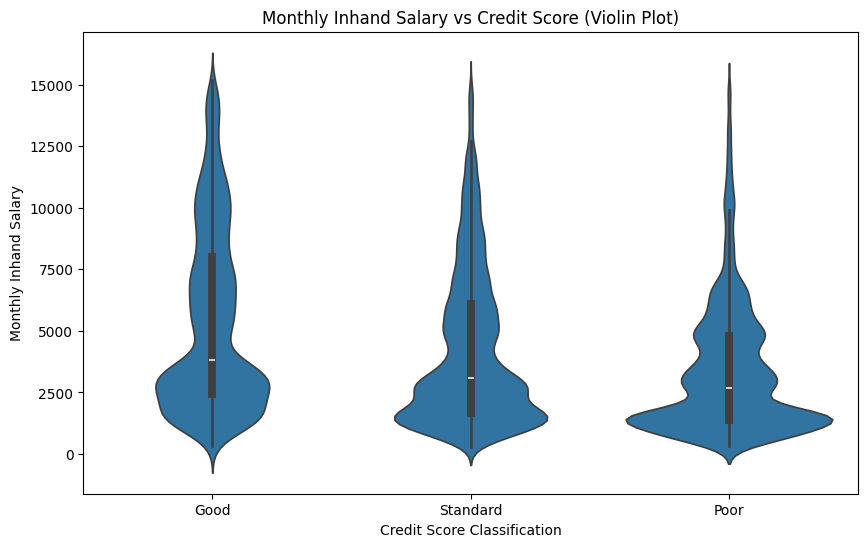

In [14]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df_credit)
plt.title('Monthly Inhand Salary vs Credit Score (Box Plot)')
plt.xlabel('Credit Score Classification')
plt.ylabel('Monthly Inhand Salary')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df_credit)
plt.title('Monthly Inhand Salary vs Credit Score (Violin Plot)')
plt.xlabel('Credit Score Classification')
plt.ylabel('Monthly Inhand Salary')
plt.show()


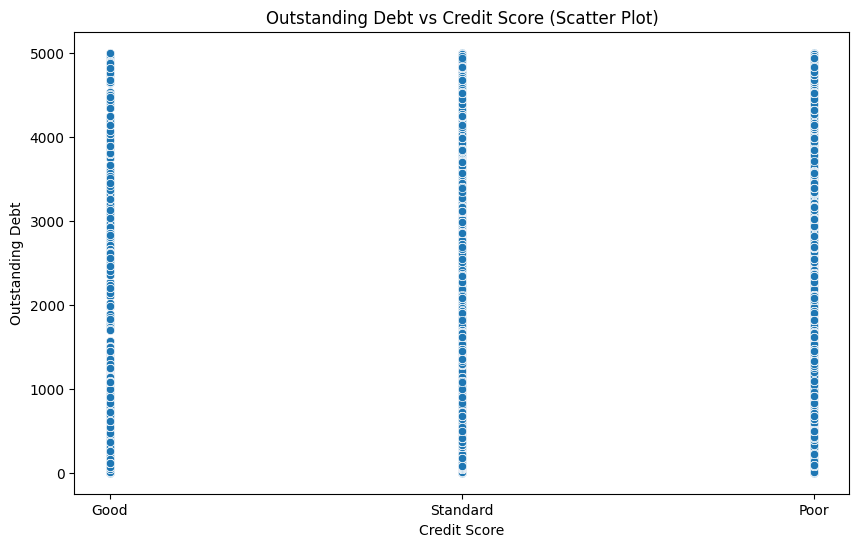

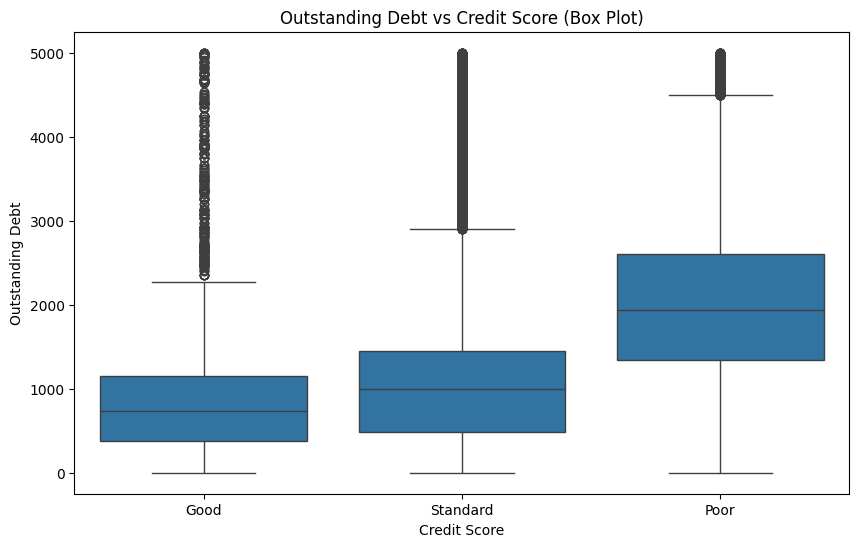

In [15]:

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Credit_Score', y='Outstanding_Debt', data=df_credit)
plt.title('Outstanding Debt vs Credit Score (Scatter Plot)')
plt.xlabel('Credit Score')
plt.ylabel('Outstanding Debt')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df_credit)
plt.title('Outstanding Debt vs Credit Score (Box Plot)')
plt.xlabel('Credit Score')
plt.ylabel('Outstanding Debt')
plt.show()